In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
import pickle
import joblib
from sklearn import metrics


from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import linear_model

from sklearn import svm

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV



from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

In [42]:
df=pd.read_csv('cal_housing with header.csv')

In [43]:
df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41,880,129,322,126,8.3252,452600.0
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500.0
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100.0
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300.0
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200.0


In [44]:
df.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


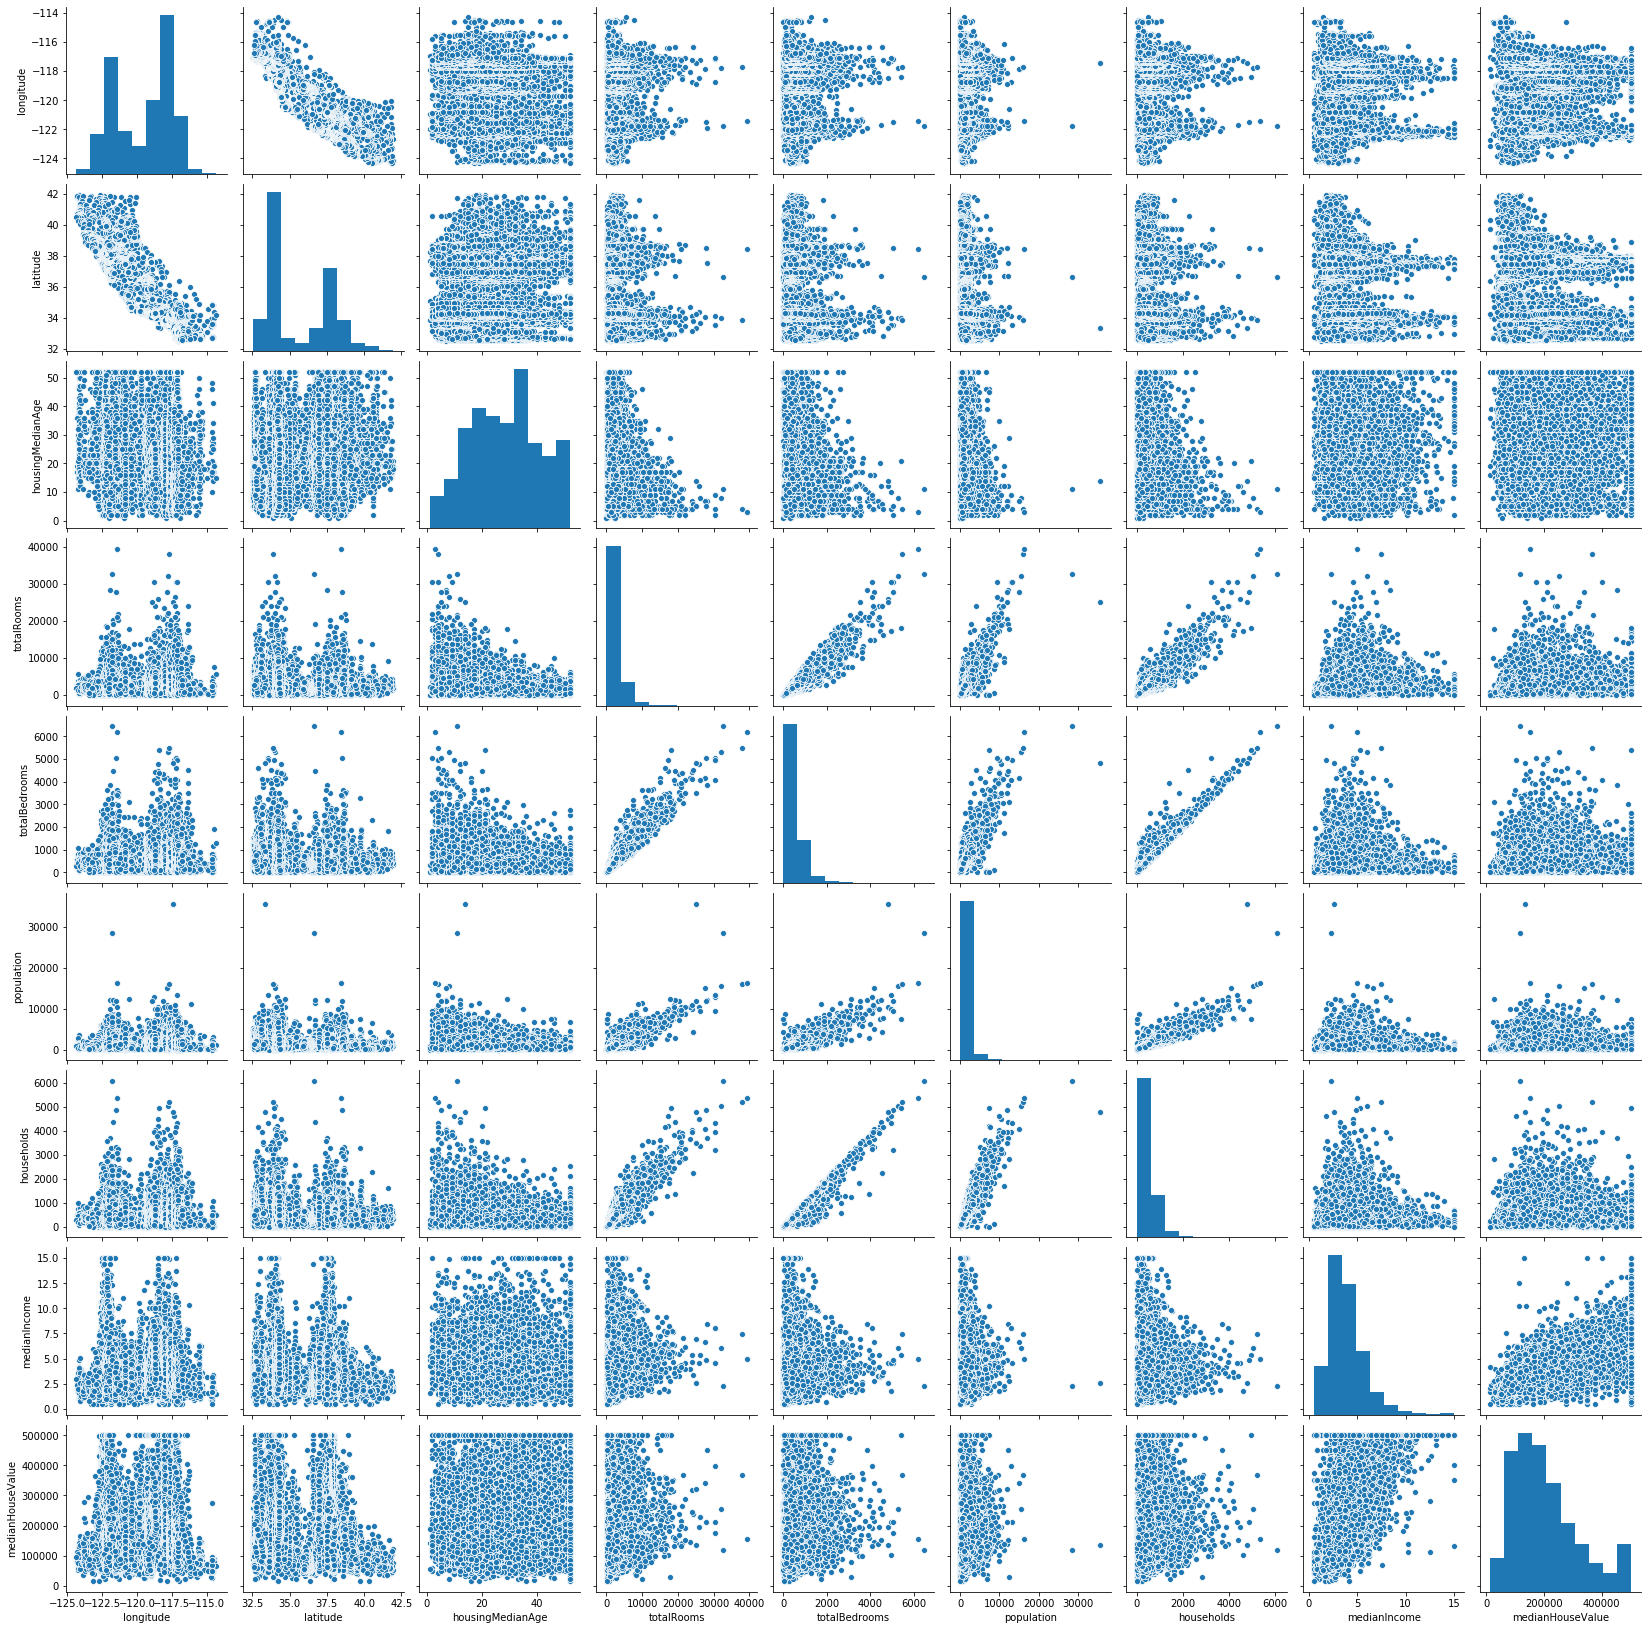

In [45]:

sns.pairplot(df)

In [46]:
co_relation=df.corr()

Index(['longitude', 'latitude', 'housingMedianAge', 'totalRooms',
       'totalBedrooms', 'population', 'households', 'medianIncome',
       'medianHouseValue'],
      dtype='object')


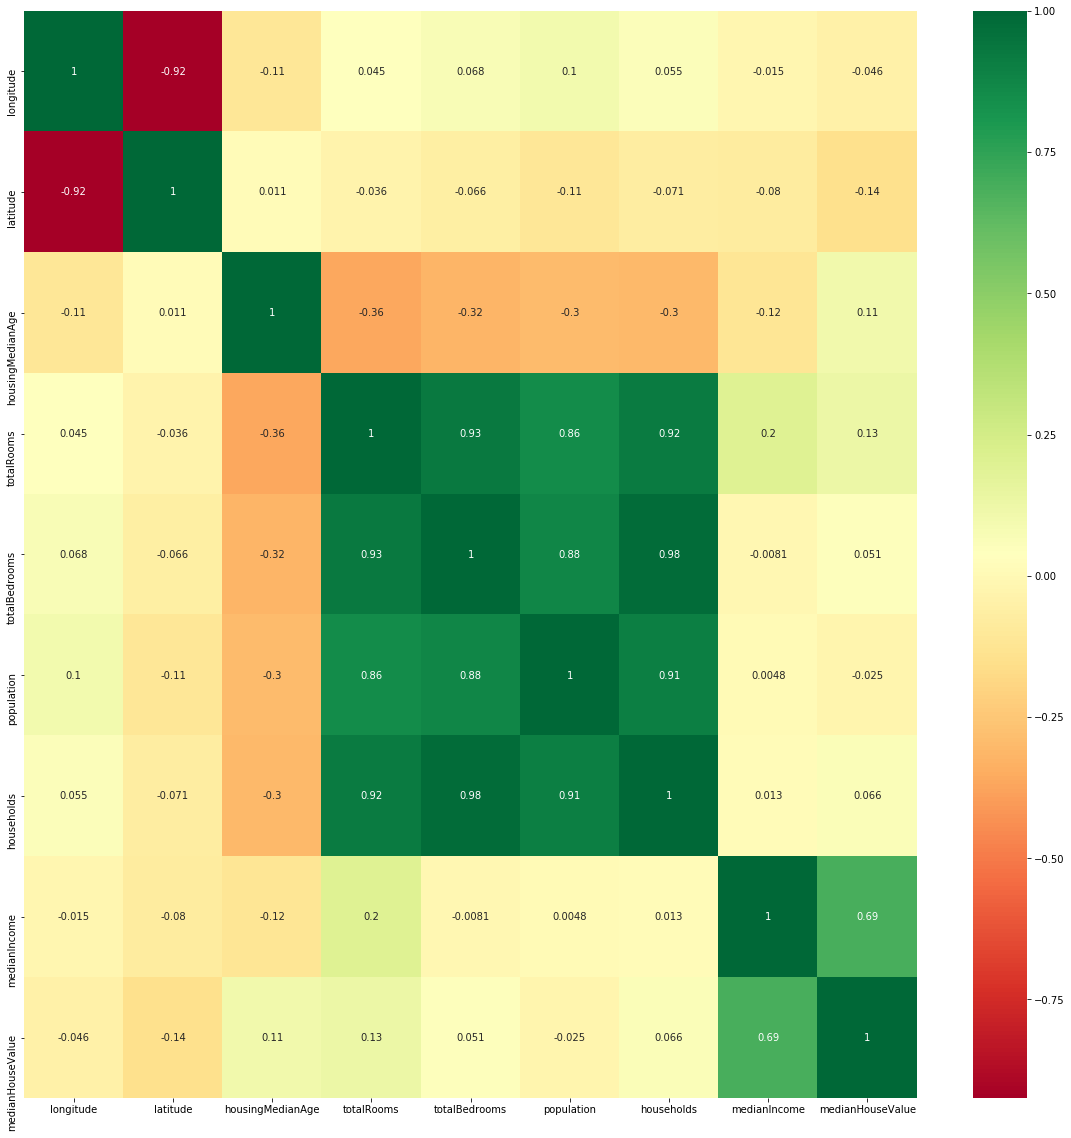

In [47]:
top_corr_features = co_relation.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
print(top_corr_features)

In [48]:
df.isnull().sum()

longitude           0
latitude            0
housingMedianAge    0
totalRooms          0
totalBedrooms       0
population          0
households          0
medianIncome        0
medianHouseValue    0
dtype: int64

In [49]:
n=len(df.columns)

In [50]:
X=df.iloc[:,:n-1]
y=df.iloc[:,n-1]

In [51]:
X.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
0,-122.23,37.88,41,880,129,322,126,8.3252
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014
2,-122.24,37.85,52,1467,190,496,177,7.2574
3,-122.25,37.85,52,1274,235,558,219,5.6431
4,-122.25,37.85,52,1627,280,565,259,3.8462


In [52]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: medianHouseValue, dtype: float64

In [53]:

model = RandomForestRegressor()

model.fit(X,y)

RandomForestRegressor()

In [54]:
print(model.feature_importances_)

[0.16175052 0.15505982 0.06485303 0.02480453 0.02673101 0.03507598
 0.02023831 0.51148682]


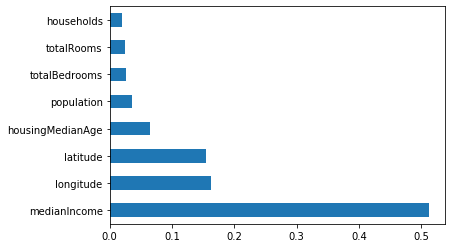

In [55]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# LINEAR REGRESSION.

In [57]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
lr = LinearRegression()

In [58]:
%%time
lr.fit(X_train,y_train)

Wall time: 3.95 ms


LinearRegression()

In [59]:
lr_predictions=lr.predict(X_test)
lr.score(X_train,y_train)

0.6393970644264775

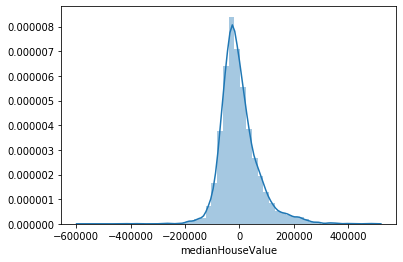

In [60]:

sns.distplot(y_test-lr_predictions)

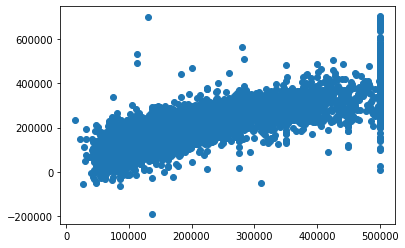

In [61]:
plt.scatter(y_test,lr_predictions)

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, lr_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_predictions)))

MAE: 50795.899367585094
MSE: 4917962771.727295
RMSE: 70128.18813948707


In [63]:
lr_joblib_file = "VK_lr_model_CV.pkl"  
joblib.dump(lr, lr_joblib_file)
# dump information to that file
#pickle.dump(rf_random, file)

['VK_lr_model_CV.pkl']

# RIDGE REGRESSION

In [64]:
rr = linear_model.RidgeCV(alphas=[0.1,0.2,0.3,0.4,0.5,0.9, 1.0,2,3,4,5,6, 10.0], cv=3, fit_intercept=True, scoring=None, normalize=True)


In [65]:
#rr = Ridge(alpha=1)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
rr_predictions= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,rr_predictions))) 
print(r2_score(y_test, rr_predictions))
print(rr_predictions)


72866.70231337256
0.6010333768646172
73992.59475607504
0.5893524621335464
[207533.55774556 281981.90162197 207892.03592459 ... 358670.65052862
 120529.51170999 248765.62807521]


In [66]:
rr.coef_

array([-1.78459437e+04, -1.88494137e+04,  1.43161383e+03, -1.04661640e+00,
        3.93596533e+01, -2.11169501e+01,  4.37445835e+01,  3.78625735e+04])

In [67]:
rr.intercept_

-1452896.0024995133

In [68]:
rr.alpha_

0.1

In [69]:
rr.score(X_test,y_test)

0.5893524621335464

In [70]:
rr = Ridge(alpha=3)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
from sklearn.metrics import mean_squared_error
rr_predictions= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,rr_predictions))) 
print(r2_score(y_test, rr_predictions))
print(rr_predictions)

69274.83295342627
0.6393970223123246
70128.06612120064
0.6311273683093601
[211045.07742829 278837.666093   189912.14952184 ... 366456.94802381
  94344.57128811 268569.87292276]


In [71]:
#rr = Ridge(alpha=1)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
from sklearn.metrics import mean_squared_error
rr_predictions= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,rr_predictions))) 
print(r2_score(y_test, rr_predictions))
print(rr_predictions)

69274.83295342627
0.6393970223123246
70128.06612120064
0.6311273683093601
[211045.07742829 278837.666093   189912.14952184 ... 366456.94802381
  94344.57128811 268569.87292276]


In [72]:
print('MAE:', metrics.mean_absolute_error(y_test, rr_predictions))
print('MSE:', metrics.mean_squared_error(y_test, rr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rr_predictions)))

MAE: 50795.53405486186
MSE: 4917945657.899488
RMSE: 70128.06612120064


In [73]:
joblib_file = "VK_RR_Model_CV.pkl"  
joblib.dump(rr, joblib_file)
# dump information to that file
#pickle.dump(rf_random, file)

['VK_RR_Model_CV.pkl']

# LASSO REGRESSION

In [74]:
model_lasso = Lasso(alpha=1)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

lasso_predictions= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,lasso_predictions))) 
print(r2_score(y_test, lasso_predictions))

69274.82895889378
0.6393970638985751
70128.17295947463
0.6311262443728967


In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, lasso_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lasso_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_predictions)))

MAE: 50795.85806276414
MSE: 4917960642.633989
RMSE: 70128.17295947463


In [76]:
joblib_file = "VK_LASSO_Model_CV.pkl"  
joblib.dump(model_lasso, joblib_file)
# dump information to that file
#pickle.dump(rf_random, file)

['VK_LASSO_Model_CV.pkl']

# ELASTC NET REGRESSION

In [77]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

ELASTIC_predictions= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,ELASTIC_predictions)))
print(r2_score(y_test, ELASTIC_predictions))

69277.09159582673
0.6393735076701961
70127.40579877053
0.6311343148498618


In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, ELASTIC_predictions))
print('MSE:', metrics.mean_squared_error(y_test, ELASTIC_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ELASTIC_predictions)))

MAE: 50788.77573778632
MSE: 4917853044.065435
RMSE: 70127.40579877053


In [79]:
joblib_file = "VK_ELASTIC_Model_CV.pkl"  
joblib.dump(model_enet, joblib_file)
# dump information to that file
#pickle.dump(rf_random, file)

['VK_ELASTIC_Model_CV.pkl']